In [1]:
import os, shutil
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import tensorflow as tf

tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
def create_folders(lis):
    for l in lis:
        os.mkdir(l)

In [3]:
org_data_dir = '../data/train/'

In [4]:
base_dir = '../data/experiment/'
# os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')
# create_folders([train_dir,test_dir,validation_dir])

In [6]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
# create_folders([train_cats_dir,train_dogs_dir,test_cats_dir,test_dogs_dir,validation_cats_dir,validation_dogs_dir])

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]

for fname in fnames:
    src = os.path.join(org_data_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copy(src,dst)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(2000,2500)]

for fname in fnames:
    src = os.path.join(org_data_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copy(src,dst)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(2500,3000)]

for fname in fnames:
    src = os.path.join(org_data_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copy(src,dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]

for fname in fnames:
    src = os.path.join(org_data_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copy(src,dst)

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(2000,2500)]

for fname in fnames:
    src = os.path.join(org_data_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copy(src,dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(2500,3000)]

for fname in fnames:
    src = os.path.join(org_data_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copy(src,dst)

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import tensorflow as tf

In [15]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(20,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.0001),metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 20)      560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        5792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 4000 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,steps_per_epoch=80,epochs=30,validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
80/80 [==============================] - 47s 318ms/step - loss: 0.6947 - acc: 0.4890 - val_loss: 0.6898 - val_acc: 0.5000
Epoch 2/30
80/80 [==============================] - 54s 673ms/step - loss: 0.6829 - acc: 0.5435 - val_loss: 0.6626 - val_acc: 0.6250
Epoch 3/30
80/80 [==============================] - 14s 176ms/step - loss: 0.6640 - acc: 0.5889 - val_loss: 0.6432 - val_acc: 0.6370
Epoch 4/30
80/80 [==============================] - 12s 153ms/step - loss: 0.6522 - acc: 0.6359 - val_loss: 0.6455 - val_acc: 0.6180
Epoch 5/30
80/80 [==============================] - 11s 136ms/step - loss: 0.6425 - acc: 0.6349 - val_loss: 0.6228 - val_acc: 0.6540
Epoch 6/30
80/80 [==============================] - 12s 143ms/step - loss: 0.6232 - acc: 0.6399 - val_loss: 0.6513 - val_acc: 0.6060
Epoch 7/30
80/80 [==============================] - 18s 225ms/step - loss: 0.6053 - acc: 0.6800 - val_loss: 0.5913 - val_acc: 0.6880
Epoch 8/30
80/80 [==============================] - 13s 161ms/step - 

In [ ]:
# !pip install scipy

In [15]:
model.save('cats_and_dogs_small_1.h5')

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(20,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.0001),metrics=['acc'])

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 4000 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator,steps_per_epoch=80,epochs=100,validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
80/80 [==============================] - 51s 327ms/step - loss: 0.6930 - acc: 0.5330 - val_loss: 0.6900 - val_acc: 0.5930
Epoch 2/100
80/80 [==============================] - 25s 311ms/step - loss: 0.6914 - acc: 0.5265 - val_loss: 0.6795 - val_acc: 0.5840
Epoch 3/100
80/80 [==============================] - 22s 272ms/step - loss: 0.6806 - acc: 0.5530 - val_loss: 0.6663 - val_acc: 0.5810
Epoch 4/100
80/80 [==============================] - 22s 277ms/step - loss: 0.6786 - acc: 0.5899 - val_loss: 0.6710 - val_acc: 0.5470
Epoch 5/100
80/80 [==============================] - 21s 256ms/step - loss: 0.6743 - acc: 0.5937 - val_loss: 0.6511 - val_acc: 0.6360
Epoch 6/100
80/80 [==============================] - 21s 256ms/step - loss: 0.6616 - acc: 0.5992 - val_loss: 0.6462 - val_acc: 0.6040
Epoch 7/100
80/80 [==============================] - 19s 233ms/step - loss: 0.6653 - acc: 0.5954 - val_loss: 0.6337 - val_acc: 0.6510
Epoch 8/100
80/80 [==============================] - 21s 265ms

Epoch 62/100
80/80 [==============================] - 18s 222ms/step - loss: 0.5299 - acc: 0.7470 - val_loss: 0.5216 - val_acc: 0.7320
Epoch 63/100
80/80 [==============================] - 18s 227ms/step - loss: 0.5185 - acc: 0.7460 - val_loss: 0.4711 - val_acc: 0.7690
Epoch 64/100
80/80 [==============================] - 18s 222ms/step - loss: 0.5182 - acc: 0.7335 - val_loss: 0.4688 - val_acc: 0.7770
Epoch 65/100
80/80 [==============================] - 18s 222ms/step - loss: 0.5086 - acc: 0.7450 - val_loss: 0.4706 - val_acc: 0.7620
Epoch 66/100
80/80 [==============================] - 18s 223ms/step - loss: 0.5278 - acc: 0.7206 - val_loss: 0.4920 - val_acc: 0.7460
Epoch 67/100
80/80 [==============================] - 17s 218ms/step - loss: 0.5516 - acc: 0.7074 - val_loss: 0.4686 - val_acc: 0.7700
Epoch 68/100
80/80 [==============================] - 18s 221ms/step - loss: 0.5384 - acc: 0.7259 - val_loss: 0.4567 - val_acc: 0.7710
Epoch 69/100
80/80 [==============================] - 1

In [12]:
from tensorflow.keras.applications import VGG16

In [13]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [15]:
import numpy as np

In [15]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [16]:
def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] =labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [17]:
train_features, train_labels = extract_features(train_dir,2000)

Found 4000 images belonging to 2 classes.


In [18]:
validation_features, validation_labels = extract_features(validation_dir,1000)

Found 1000 images belonging to 2 classes.


In [19]:
test_features, test_labels = extract_features(test_dir,1000)

Found 1000 images belonging to 2 classes.


In [20]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [22]:
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [23]:
model.compile(optimizer=optimizers.RMSprop(lr=0.00002),loss='binary_crossentropy',metrics=['acc'])

In [24]:
history = model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 15ms/step - loss: 0.6811 - acc: 0.6132 - val_loss: 0.4309 - val_acc: 0.8370
Epoch 2/30
100/100 [==============================] - 1s 9ms/step - loss: 0.4583 - acc: 0.7875 - val_loss: 0.3646 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3575 - acc: 0.8475 - val_loss: 0.3310 - val_acc: 0.8650
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3341 - acc: 0.8556 - val_loss: 0.3151 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2956 - acc: 0.8812 - val_loss: 0.2978 - val_acc: 0.8780
Epoch 6/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2712 - acc: 0.8858 - val_loss: 0.2873 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2588 - acc: 0.8917 - val_loss: 0.2848 - val_acc: 0.8800
Epoch 8/30
100/100 [==============================] - 1s 9ms/step - loss: 

In [17]:
import matplotlib.pyplot as plt

In [18]:
def compare_plots_(train,val,metric):
    epochs = range(1,len(train)+1)
    plt.plot(epochs,train,'bo',label='Training %s'%(metric))
    plt.plot(epochs,val,'ro',label='Validation %s'%(metric))
    plt.title('Training and Validation %s'%(metric))
    plt.legend()
    plt.show()

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

In [22]:
compare_plots_(acc,val_acc,'accuracy')

In [16]:
conv_base.trainable = False

In [17]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [18]:
len(model.trainable_weights)

4

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.00002),metrics=['acc'])

In [23]:
history = model.fit(train_generator,steps_per_epoch=80,epochs=30,validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
80/80 [==============================] - 100s 738ms/step - loss: 0.6564 - acc: 0.6005 - val_loss: 0.4959 - val_acc: 0.7690
Epoch 2/30
80/80 [==============================] - 56s 695ms/step - loss: 0.5202 - acc: 0.7590 - val_loss: 0.4063 - val_acc: 0.8240
Epoch 3/30
80/80 [==============================] - 58s 721ms/step - loss: 0.4583 - acc: 0.7885 - val_loss: 0.3705 - val_acc: 0.8390
Epoch 4/30
80/80 [==============================] - 62s 773ms/step - loss: 0.4331 - acc: 0.8100 - val_loss: 0.3405 - val_acc: 0.8460
Epoch 5/30
80/80 [==============================] - 62s 776ms/step - loss: 0.3949 - acc: 0.8182 - val_loss: 0.3188 - val_acc: 0.8510
Epoch 6/30
80/80 [==============================] - 63s 781ms/step - loss: 0.3909 - acc: 0.8178 - val_loss: 0.3299 - val_acc: 0.8570
Epoch 7/30
80/80 [==============================] - 70s 872ms/step - loss: 0.3933 - acc: 0.8264 - val_loss: 0.2944 - val_acc: 0.8710
Epoch 8/30
80/80 [==============================] - 57s 712ms/step -

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']

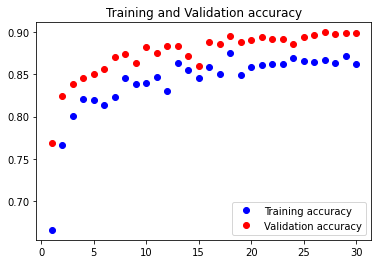

In [28]:
compare_plots_(acc,val_acc,'accuracy')

#############

In [23]:
conv_base.trainable = True

In [24]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [26]:
len(model.trainable_weights)

10

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.00001),metrics=['acc'])

In [25]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 116s 772ms/step - loss: 0.6035 - acc: 0.6500 - val_loss: 0.3490 - val_acc: 0.8480
Epoch 2/100
100/100 [==============================] - 74s 737ms/step - loss: 0.4256 - acc: 0.8101 - val_loss: 0.2968 - val_acc: 0.8750
Epoch 3/100
100/100 [==============================] - 75s 751ms/step - loss: 0.3525 - acc: 0.8461 - val_loss: 0.2391 - val_acc: 0.8930
Epoch 4/100
100/100 [==============================] - 75s 748ms/step - loss: 0.3026 - acc: 0.8656 - val_loss: 0.2663 - val_acc: 0.8940
Epoch 5/100
100/100 [==============================] - 84s 840ms/step - loss: 0.2662 - acc: 0.8945 - val_loss: 0.2108 - val_acc: 0.9130
Epoch 6/100
100/100 [==============================] - 83s 835ms/step - loss: 0.2591 - acc: 0.8828 - val_loss: 0.2034 - val_acc: 0.9120
Epoch 7/100
100/100 [==============================] - 86s 865ms/step - loss: 0.2552 - acc: 0.8870 - val_loss: 0.2206 - val_acc: 0.9210
Epoch 8/100
100/100 [==========================

KeyboardInterrupt: 